In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/except_hurt.zip'

-rw------- 1 root root 741372502 Nov  8 07:19 '/content/drive/My Drive/Colab Notebooks/datasets/except_hurt.zip'


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/except_hurt.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_░°░°╜├╝│_┴╛▒│_└╟╖с╜├╝│_20210122185121-001-004.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╡╡╜╔ ╚п░ц_20210122185346-008-011.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╗є╛ў╜├╝│_┴б╞ў_╜├└х_20210122185217-003-015.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╝ў╣┌ ╣╫ ░┼┴╓░°░г_20210122173113-010-003.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╜║╞ў├ў ░№╢ў ╣╫ ╖╣└·╜├╝│_20210122185231-004-003.jpg  
  inflating: train/neutrality/1f830bb52573ddb5f8913e0c233cb34b2847050021b5fe8e4e91f3f2f121e3c5_│▓_20_┴▀╕│_▒│┼ы_└╠╡┐╝Ў┤▄(┐д╕о║г└╠┼═ ╞ў╟╘)_20210203121141-002-005.jpg  
  inflating: train/neutrality/

In [ ]:
train_dir = 'train'
valid_dir = 'validation'

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(206,278,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.trainable=True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 206, 278, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 206, 278, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 206, 278, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 103, 139, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 103, 139, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 103, 139, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 51, 69, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_dim=6 * 8 * 512))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 24576)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6291712   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 21,007,942
Trainable params: 13,372,678
Non-trainable params: 7,635,264
_________________________________________________________________


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (206,278),
    batch_size=32,
    class_mode = 'categorical')

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (206, 278),
    batch_size = 32,
    class_mode = 'categorical')

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=188,
                    epochs=15,
                    validation_data=valid_generator,
                    validation_steps=75)

Found 6000 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.
Epoch 1/15
188/188 [==============================] - 272s 1s/step - loss: 1.4248 - acc: 0.4265 - val_loss: 1.1927 - val_acc: 0.5408
Epoch 2/15
188/188 [==============================] - 224s 1s/step - loss: 1.1118 - acc: 0.5785 - val_loss: 1.0412 - val_acc: 0.6033
Epoch 3/15
188/188 [==============================] - 225s 1s/step - loss: 0.9886 - acc: 0.6233 - val_loss: 1.1753 - val_acc: 0.5783
Epoch 4/15
188/188 [==============================] - 224s 1s/step - loss: 0.9197 - acc: 0.6617 - val_loss: 1.0526 - val_acc: 0.6175
Epoch 5/15
188/188 [==============================] - 224s 1s/step - loss: 0.8658 - acc: 0.6818 - val_loss: 0.9720 - val_acc: 0.6304
Epoch 6/15
188/188 [==============================] - 224s 1s/step - loss: 0.8088 - acc: 0.6992 - val_loss: 1.0142 - val_acc: 0.6396
Epoch 7/15
188/188 [==============================] - 224s 1s/step - loss: 0.7661 - acc: 0.7312 - val_loss: 0.9522 - v

In [11]:
model.save('/content/drive/My Drive/Colab Notebooks/models/except_hurt_aug.h5')

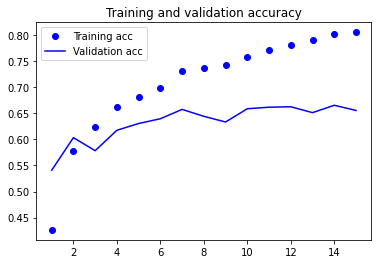

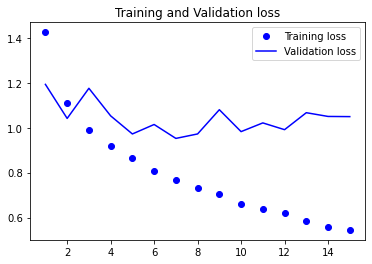

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [12]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

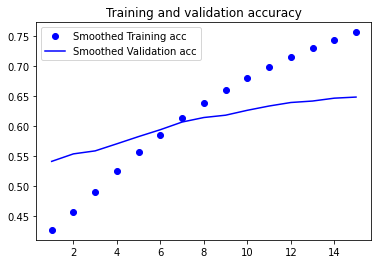

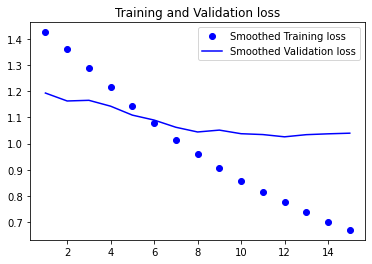

In [16]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()